# Exercise 08

For the following function 

$\begin{eqnarray}
P(x)=x\exp(-x)  \hspace{2cm}  0\leq x < \infty
\end{eqnarray}$

(a) Find the mean and standard deviation. What is the probability content in the interval (mean-standard deviation, mean+standard deviation).

(b) Find the median and 68% central interval.

(c) Find the mode and 68% smallest interval.

In [365]:
import numpy as np
import matplotlib.pyplot as plt

In [366]:
def P(x):
    return x*np.exp(-x)

In [367]:
xdata = np.arange(0.,15.,0.1)
ydata = P(xdata)
l = len(xdata)
stepsize= xdata[2]-xdata[1]
print("Length of xdata array is: l=%d" % l)
print("Stepsize = %f" % stepsize)
print("'xdata' are the right edges of the bins.")
print("bin 1: from (-0.1,0.0] -> it is empty. The only valid point in this interval is 0 and it has the value 0.")
print("bin 2: from 0.00000001 to 0.1: (0.,0.1] -> the value of its is %.2f" % ydata[1])
print("!!! Python starts indexing at 0 -> Bin 1 has index 0 !")

Length of xdata array is: l=150
Stepsize = 0.100000
'xdata' are the right edges of the bins.
bin 1: from (-0.1,0.0] -> it is empty. The only valid point in this interval is 0 and it has the value 0.
bin 2: from 0.00000001 to 0.1: (0.,0.1] -> the value of its is 0.09
!!! Python starts indexing at 0 -> Bin 1 has index 0 !


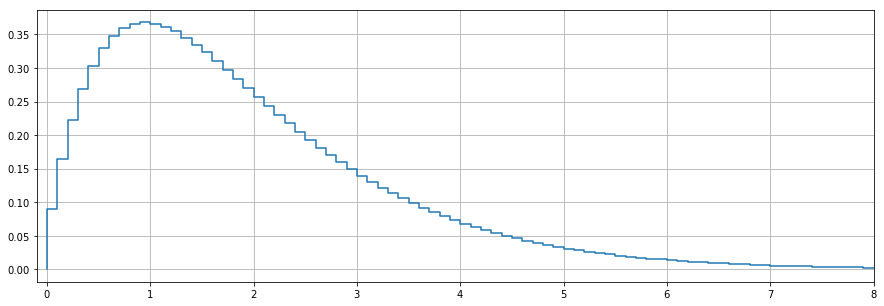

In [368]:
plt.figure(figsize=(15, 5))
plt.step(xdata,ydata)
plt.grid('on')
plt.xlim(-0.1,8)
plt.show()

## (a) Find the mean and standard deviation. What is the probability content in the interval (mean-standard deviation, mean+standard deviation).

In [369]:
def calc_mean(xdata, ydata):
    mean = 0.
    area = 0.
    for i in range(1,len(xdata)):
        mean += (xdata[i]-0.5*stepsize)*ydata[i]  # use midpoints of interval
        area += abs(ydata[i])
    return mean/area

def calc_std(xdata, ydata, mean):
    std = 0.
    area = 0.
    for i in range(0,len(xdata)):
        std += (xdata[i]-0.5*stepsize-mean)**2*ydata[i]
        area += abs(ydata[i])
    return std/area

def calc_total_probability(xdata,ydata):
    total_prob = 0.
    for i in range(0,len(xdata)):
        total_prob += ydata[i]*stepsize
    return total_prob

In [370]:
mean = calc_mean(xdata,ydata)
std = calc_std(xdata,ydata,mean)
total_probability = calc_total_probability(xdata,ydata)
print("mean: = %.3f" % mean)
print("standard deviation: = %.3f" % std)
print("total probability: = %.3f" % total_probability)

mean: = 1.952
standard deviation: = 1.997
total probability: = 0.999


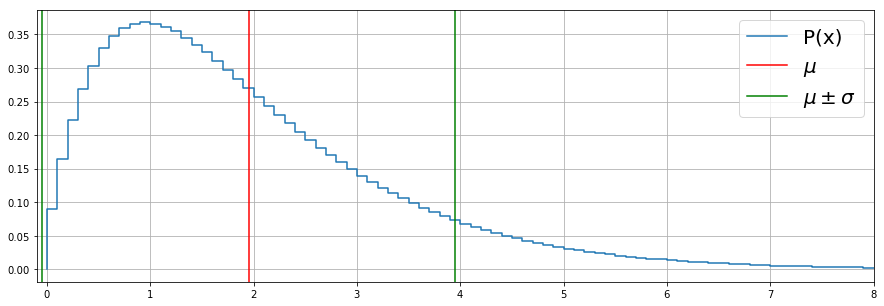

In [371]:
plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim(-0.1,8)

plt.axvline(mean, color='red', label=r"$\mu$")
plt.axvline(mean-std, color='green', label=r"$\mu\pm\sigma$")
plt.axvline(mean+std, color='green')

plt.legend(fontsize=20)
plt.show()

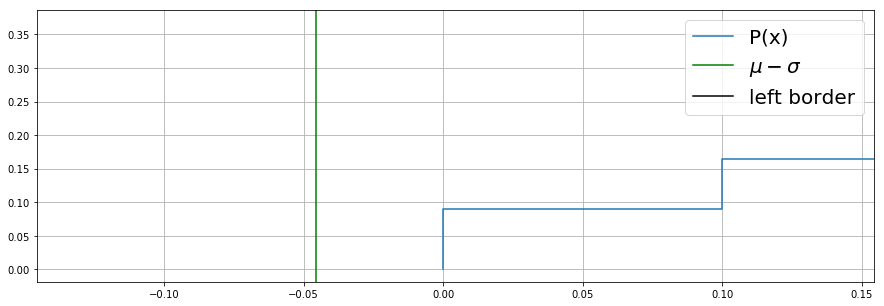

0

In [372]:
# First: Get left index of the interval:
idx_l = 0
for i in range(0,len(xdata)):
    if xdata[i] >= (mean-std):
        idx_l = i
        break

plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim((mean-std)-1*stepsize,(mean-std)+2*stepsize)

plt.axvline(mean-std, color='green', label=r"$\mu-\sigma$")
plt.axvline(xdata[idx_l-1], color='black', label=r"left border")

plt.legend(fontsize=20)
plt.show()
idx_l

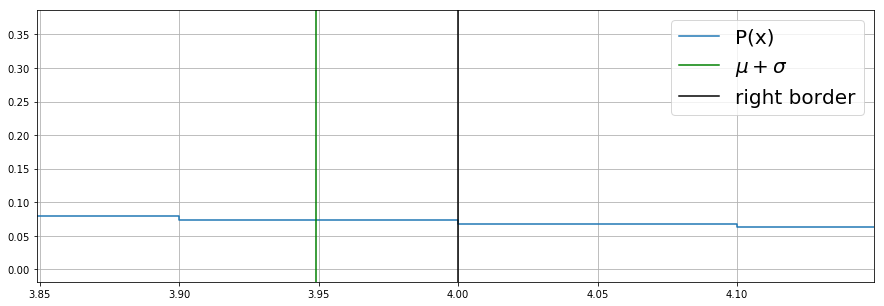

40

In [373]:
# Second: Get right index of the interval:
idx_r = len(xdata)-1
for i in range(1,len(xdata)):
    if xdata[i] >(mean+std):
        idx_r = i
        break
        
plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim((mean+std)-1*stepsize,(mean+std)+2*stepsize)

plt.axvline(mean+std, color='green', label=r"$\mu+\sigma$")
plt.axvline(xdata[idx_r], color='black', label=r"right border")

plt.legend(fontsize=20)
plt.show()
idx_r

In [374]:
# Check:
print(idx_l, idx_r)
if idx_l == 0:
    check = 2*std < xdata[idx_r]-xdata[idx_l]
else:
    check = 2*std < xdata[idx_r]-xdata[idx_l-1]
check

(0, 40)


True

In [375]:
# Sum up the bin entries of the bins of the interval
p_std = 0.
for i in range(idx_l, idx_r):
    p_std += ydata[i]
p_std *= stepsize
p_std

0.90387997439385159

## (b) Find the median and 68% central interval.

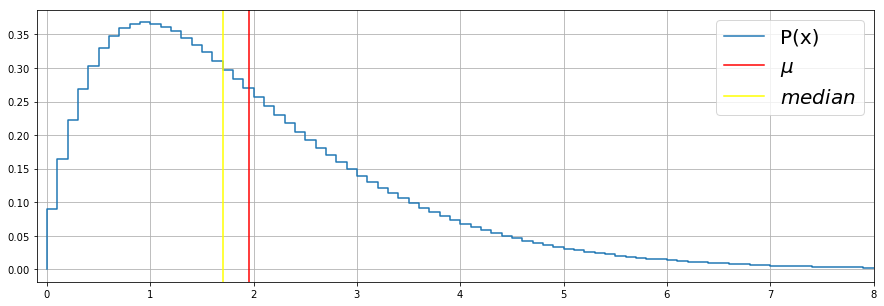

idx_median=17
P(idx_median)=0.31


In [376]:
def idx_median(xdata,ydata):
    idx_median = 0
    cumulative_sum = 0.
    for i in range(0,len(xdata)):
        cumulative_sum += ydata[i]*stepsize   
        if cumulative_sum >= 0.5:
            idx_median = i
            break    
    return idx_median

idx_median = idx_median(xdata,ydata)

plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim(-0.1,8)

plt.axvline(mean, color='red', label=r"$\mu$")
plt.axvline(xdata[idx_median], color='yellow', label=r"$median$")

plt.legend(fontsize=20)
plt.show()

print("idx_median=%d" % idx_median)
print("P(idx_median)=%.2f" % ydata[idx_median])

Now the central interval with $1-\alpha=68\% \rightarrow \alpha/2 = 0.16$

Find $r_1$:  $P(r < r_1) \leq \alpha/2 = 0.16$

Find $r_2$:  $P(r > r_2) \leq \alpha/2 = 0.16$

In [377]:
def get_r1(xdata,ydata):
    r1 = 0
    cumulative_sum = ydata[r1]*stepsize
    for i in range(1, len(xdata)):
        if cumulative_sum >= 0.16:
            r1 = i-1
            break
        cumulative_sum += ydata[i]*stepsize
    return r1    

def get_r2(xdata,ydata):
    r2 = len(xdata)-1
    cumulative_sum = ydata[r2]*stepsize
    for i in range(len(xdata)-2,0,-1):
        if cumulative_sum >= 0.16:
            r2 = i+1
            break
        cumulative_sum += ydata[i]*stepsize
    return r2

In [378]:
r1 = get_r1(xdata,ydata)
print("r_1 = %d" % r1)
#Check
checksum=0.
for i in range(0,r1):
    checksum+=ydata[i]*stepsize
print("checksum(r1) = %f" % checksum)
print("checksum(r1+1) = %f" % (checksum+ydata[r1]*stepsize))
    
r2 = get_r2(xdata,ydata)
print("r_2 = %d" % r2)
checksum=0.
for i in range(r2+1,len(xdata)):
    checksum+=ydata[i]*stepsize
print("checksum(r2) = %f" % checksum)
print("checksum(r2-1) = %f" % (checksum+ydata[r2-1]*stepsize))

r_1 = 7
checksum(r1) = 0.137716
checksum(r1+1) = 0.172477
r_2 = 33
checksum(r2) = 0.152577
checksum(r2-1) = 0.165621


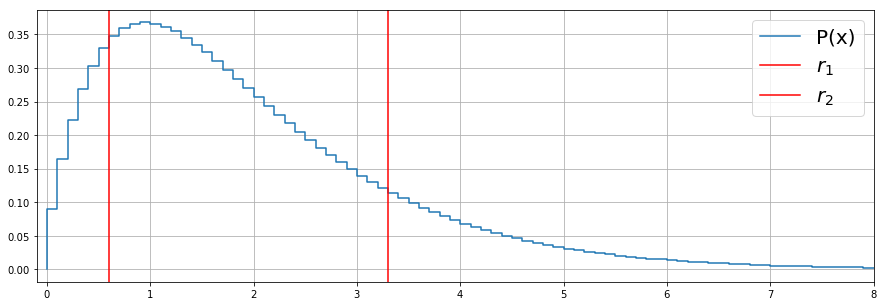

In [379]:
plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim(-0.1,8)

plt.axvline(xdata[r1-1], color='red', label=r"$r_1$")
plt.axvline(xdata[r2]  , color='red', label=r"$r_2$")
plt.legend(fontsize=20)
plt.show()

## (c) Find the mode and 68% smallest interval.

In [380]:
def idx_mode(xdata,ydata):
    idx_mode = 0
    maximum = ydata[0]
    for i in range(1,len(xdata)):  
        if ydata[i] == maximum:
            print("WARNING! -> Double Mode!")
        if ydata[i] > maximum:
            idx_mode = i
            maximum = ydata[i]
    return idx_mode

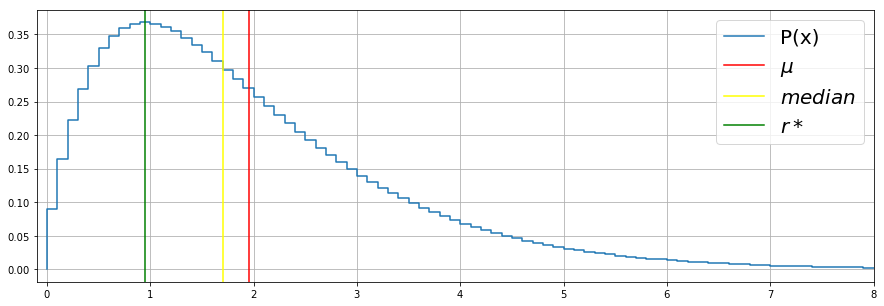

idx_mode=10
P(idx_mode)=0.367879


In [381]:
idx_mode = idx_mode(xdata,ydata)

plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim(-0.1,8)

plt.axvline(mean, color='red', label=r"$\mu$")
plt.axvline(xdata[idx_median], color='yellow', label=r"$median$")
plt.axvline(xdata[idx_mode]-0.5*stepsize, color='green', label=r"$r*$")

plt.legend(fontsize=20)
plt.show()

print("idx_mode=%d" % idx_mode)
print("P(idx_mode)=%f" % ydata[idx_mode])

In [415]:
def create_ranking(ydata):
    indices = np.arange(0,len(ydata))
    a1, ranking = zip(*sorted(zip(ydata, indices)))
    return np.flip(ranking,0)

ranking = create_ranking(ydata)
ranking

array([ 10,  11,   9,  12,   8,  13,   7,  14,  15,   6,  16,  17,   5,
        18,  19,  20,   4,  21,  22,  23,   3,  24,  25,  26,  27,  28,
         2,  29,  30,  31,  32,  33,  34,  35,  36,  37,   1,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149,   0])

In [467]:
def determine_smallest_interval(ydata, ranking):
    idx_tmp = 0
    cumulative_sum = ydata[ranking[0]]*stepsize
    for i in range(1,len(ranking)):
        if cumulative_sum >= 0.68:
            break
        idx_tmp = i
        for j in range(i+1, len(ranking)):
            if ydata[ranking[idx_tmp]] == ydata[ranking[j]]:
                idx_tmp = j
            else:
                break
        for k in range(i,idx_tmp+1):
            cumulative_sum += ydata[ranking[k]]*stepsize       
    return ranking[0:idx_tmp+1]
    
smallest_interval_indicies = determine_smallest_interval(ydata, ranking)
smallest_interval_indicies

array([10, 11,  9, 12,  8, 13,  7, 14, 15,  6, 16, 17,  5, 18, 19, 20,  4,
       21, 22, 23,  3, 24, 25])

In [468]:
checksum = 0.
for idx in smallest_interval_indicies:
    checksum += ydata[idx]*stepsize

print("checksum of smallest interval = %.5f" % checksum)

checksum of smallest interval = 0.69660
